In [60]:
import sys              

import numpy as np
import pandas as pd
import sklearn
import os

# 그래프를 위한 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt

# 머신러닝을 위한 import
from sklearn import datasets
%matplotlib inline

from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [61]:
#  레이블의 글자 크기를 설정합니다.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# 그림을 저장할 위치를 설정하고 폴더를 만듭니다.
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "OUTput"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
print(IMAGES_PATH)

# 하위 디렉토리를 함께 만듭니다.
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
# 이미지 파일을 저장합니다.
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (scipy issue #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [44]:
housing = pd.read_csv('./housing.csv')

In [62]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


NameError: name 'save_fig' is not defined

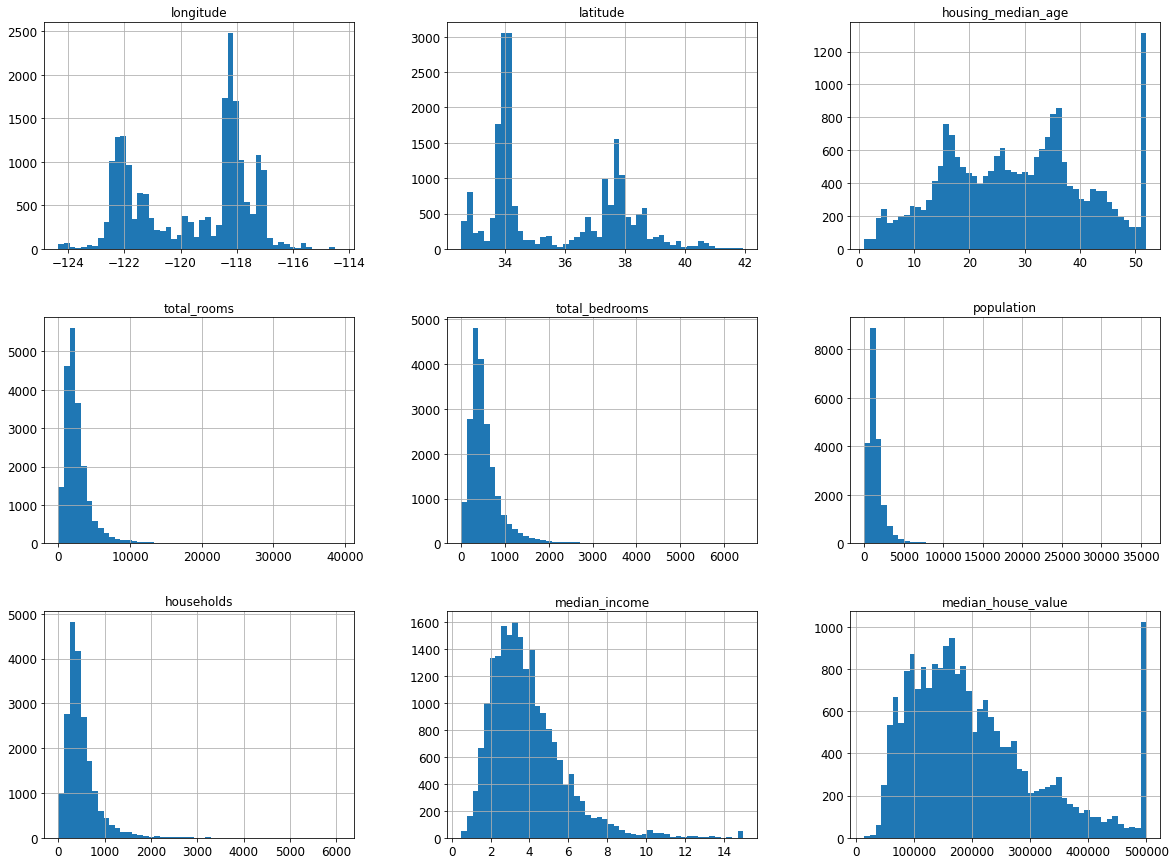

In [63]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [46]:
locations = ['longitude', 'latitude']

In [47]:
housing[locations].head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [48]:
find = ['ocean_proximity']

In [49]:
housing[find].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [50]:
housing = housing.dropna()

In [51]:
columns = housing.columns

In [52]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [53]:
X_train = housing[columns]

In [54]:
X_test = housing[columns]

In [55]:
lable_name = "ocean_proximity"

In [56]:
Y_train = housing[lable_name]

In [57]:
Y_test = housing[lable_name]

In [58]:
lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(X_train, Y_train)
accuracy = lm.score(X_test, Y_test)
# print("Linear Regression test file accuracy:"+str(accuracy))

lm.coef_

ValueError: could not convert string to float: 'NEAR BAY'